<a href="https://colab.research.google.com/github/Ronin1289/Generating-Building-Drawings-Using-Image-Processing/blob/Experiments/EXPERIMENT_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HED(Holistically-Nested Edge Detection)

In [1]:
# First install required packages
!pip install torch torchvision opencv-python numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
!pip install git+https://github.com/xwying/pytorch-hed.git

  Cloning https://github.com/xwying/pytorch-hed.git to /tmp/pip-req-build-41we_js9
  Running command git clone --filter=blob:none --quiet https://github.com/xwying/pytorch-hed.git /tmp/pip-req-build-41we_js9
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/xwying/pytorch-hed.git /tmp/pip-req-build-41we_js9 did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/xwying/pytorch-hed.git /tmp/pip-req-build-41we_js9 did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
# Install required packages
!pip install opencv-python numpy torch torchvision
!pip install git+https://github.com/xwying/pytorch-hed.git

import torch
import cv2
import numpy as np
from pytorch_hed import Network
import matplotlib.pyplot as plt
from google.colab import files

def process_image(image_path):
    # Load the pre-trained model
    network = Network()
    network.load_state_dict(torch.load('pytorch-hed/network-bsds500.pytorch'))

    if torch.cuda.is_available():
        network.cuda()
    network.eval()

    # Read and preprocess image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Prepare tensor
    tensor = torch.from_numpy(image.transpose((2, 0, 1))).float().div(255.0)
    tensor = tensor.unsqueeze(0)

    if torch.cuda.is_available():
        tensor = tensor.cuda()

    # Process image
    with torch.no_grad():
        prediction = network(tensor)

    # Convert prediction to numpy array
    prediction = prediction.cpu().numpy()[0, 0]

    return image, prediction

# Example usage:
"""
# Upload an image
uploaded = files.upload()
image_path = next(iter(uploaded))

# Process the image
original, edges = process_image(image_path)

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(original)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Detected Edges')
plt.axis('off')
plt.show()
"""

#HED from OpenCv

In [5]:
!wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/cv/ximgproc/model.yml.gz

--2025-02-22 19:35:00--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/cv/ximgproc/model.yml.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6390625 (6.1M) [application/octet-stream]
Saving to: ‘model.yml.gz’

model.yml.gz        100%[===================>]   6.09M  --.-KB/s    in 0.06s   

2025-02-22 19:35:01 (103 MB/s) - ‘model.yml.gz’ saved [6390625/6390625]



In [7]:
# Install required packages
!pip install opencv-python numpy
!pip install "opencv-contrib-python>=4.9.0"

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def detect_edges(image_path):
    # Read image
    image = cv2.imread(image_path)

    # Initialize HED
    hed = cv2.ximgproc.createStructuredEdgeDetection('model.yml.gz')

    # Process image
    edges = hed.detectEdges(cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0)

    # return cv2.cvtColor(image, cv2.COLOR_BGR2RGB), edges
    return edges


Saving gsck3.png to gsck3 (1).png


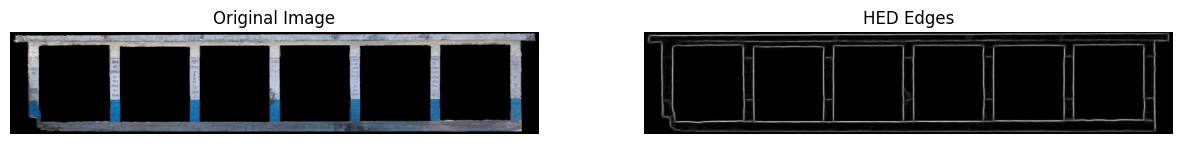

In [8]:
# Upload your image
uploaded = files.upload()
image_path = next(iter(uploaded))


In [15]:
def disp(img):
  # Display results
  plt.figure(figsize=(40, 40))
  plt.imshow(img, cmap="gray")
  plt.axis("off")
  plt.show()

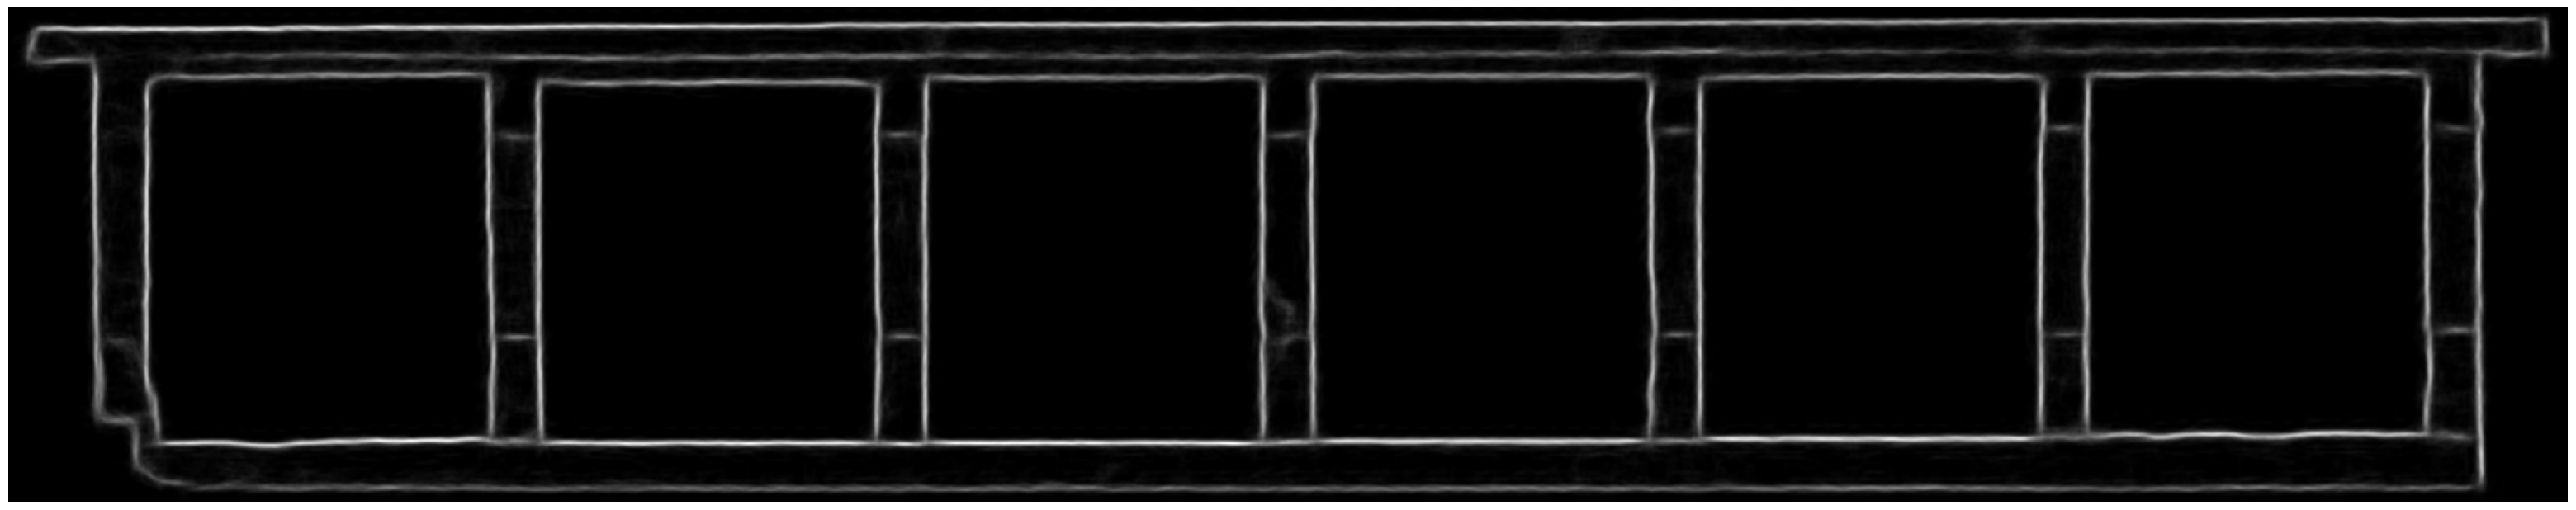

In [19]:
disp(detect_edges(image_path)[1])

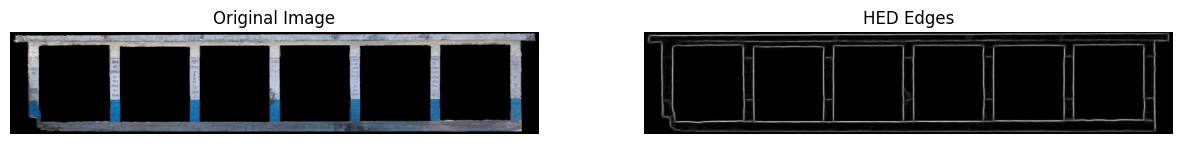

In [17]:

# Process image
original, edges = detect_edges(image_path)

# Show results
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(original)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('HED Edges')
plt.axis('off')
plt.show()